**UE 4268 - Examen (Evalution sommative) 2023**


**`vos noms et prenoms`**, `matricule` et `email` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

In [1]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous. 
1. Expliquer pourquoi on dit que c'est un algorithme hybride indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle dans les algorithmes du VQE?


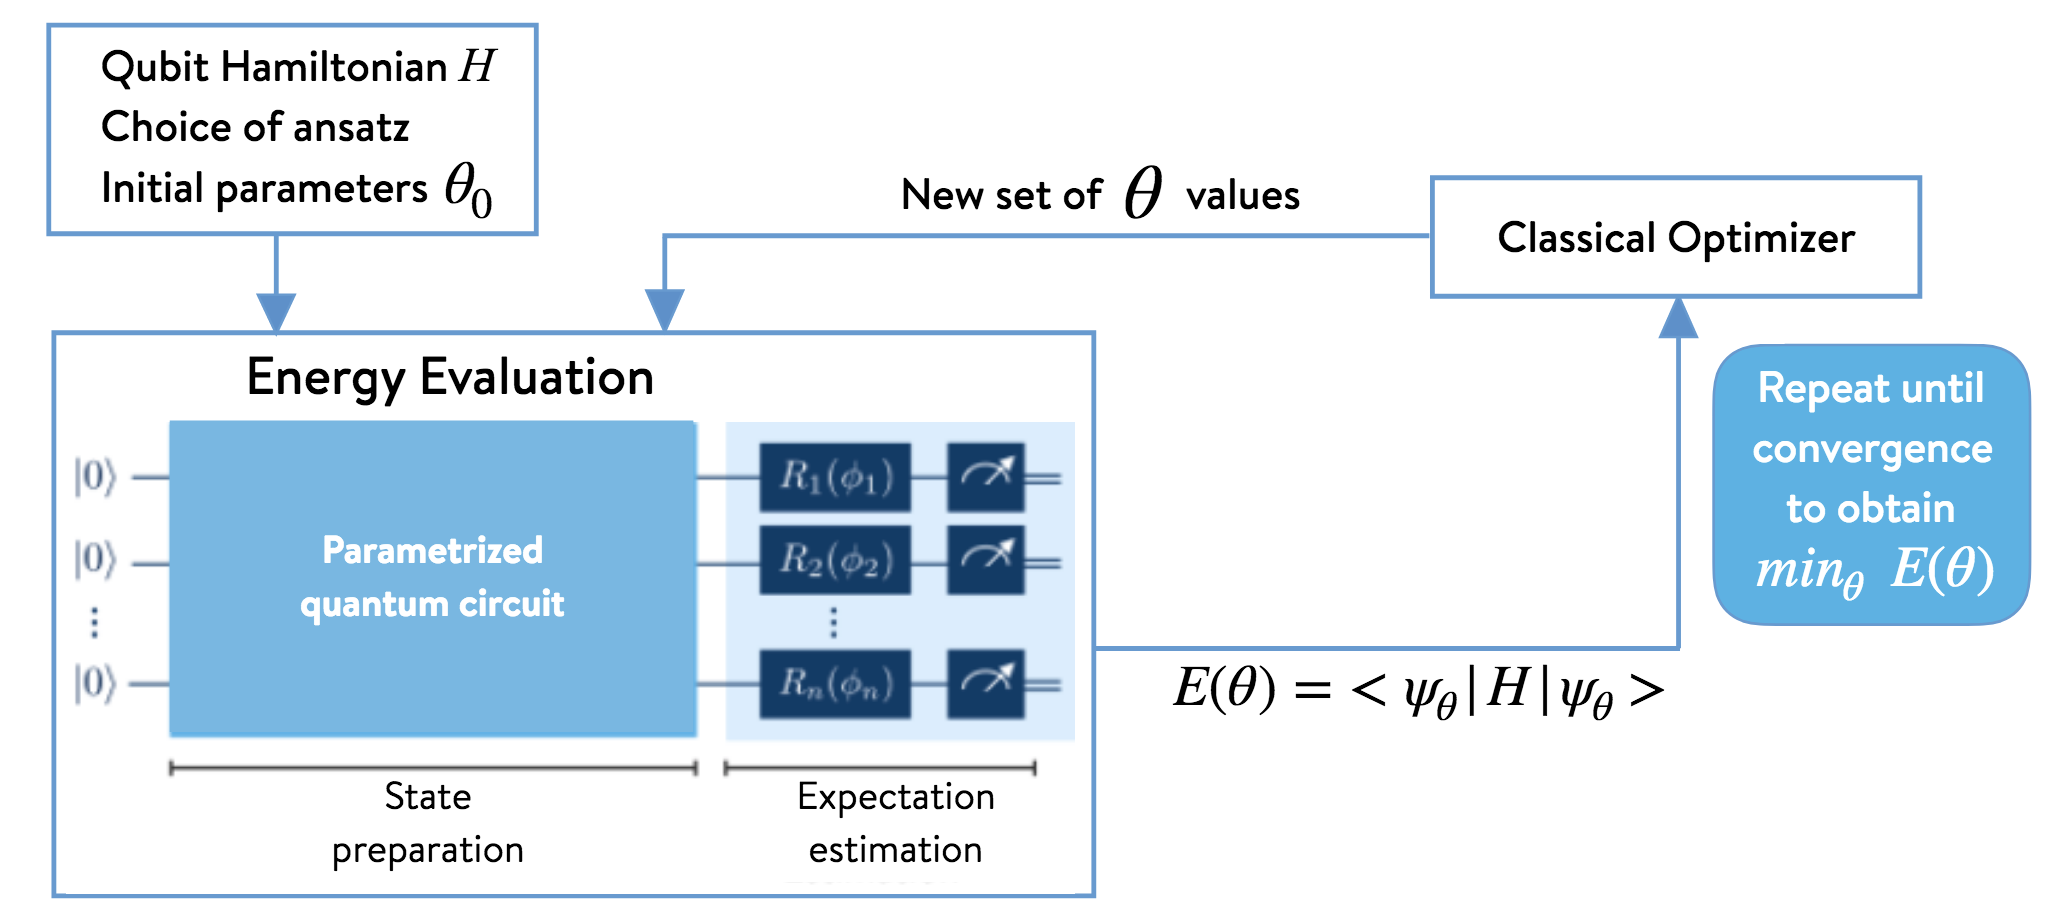

In [2]:
Image("./VQE_Diagram.png", width=600)

1. C'est l'algorithme **hybride** parce qu'il a une partie qui s'excécute sur un **processeur quantique** et une autre partie sur un **processeur classique**.
* Le **processeur quantique** comporte trois étapes fondamentales :
    1. Définir le circuit quantique ou porte quantique $\mathtt{U}(\vec{\theta})$;
    2. Préparer de la fonction d'essai paramétré $|\Psi (\vec{\theta})\rangle$ appelée **Ansatz**, qui est essentiellement une estimation de l'état fondamental, à cet effet, on choisit arbitrairement un état de référence $|\psi_0\rangle$ sur lequel on applique $\mathtt{U}(\vec{\theta})$,
    	$$
        |\Psi (\vec{\theta})\rangle= \mathtt{U}(\vec{\theta})|\psi_0 \rangle=\sum_i\alpha_i|E_i\rangle.
    	$$
    3. Mesurer de la valeur moyenne ou fonction de coût
    $$
    C(\vec\theta)=\langle\Psi(\vec\theta)|\mathtt{H}|\Psi(\vec\theta)\rangle
    =\langle \psi_0| \mathtt{U}^\dagger (\vec{\theta})\mathtt{HU} (\vec{\theta})|\psi_0\rangle.
    $$
    Selon la décomposition spectrale, $\mathtt{H}$ peut être représenté par:
    $$
    \mathtt{H}=\sum_i E_i|E_i\rangle\langle E_i|.
    $$
    En vertu du *théorème variationnel de Rayleigh-Ritz*, la valeur moyenne est toujours supérieure ou égale à la valeur propre $E_0$ la plus basse de l'Hamiltonien $\mathtt{H}$, qui correspond à l'état fondamental $|E_{\min}\rangle$:
    $$
    C(\vec\theta)=\langle \psi_0| \mathtt{U}^\dagger (\vec{\theta})\mathtt{HU} (\vec{\theta})|\psi_0\rangle
    =\sum_i|\alpha_i|^2E_i\geq E_{\min}.
    $$
    Le problème se résume à trouver un tel choix optimal de paramètres $\vec\theta=(\theta_1,\dots,\theta_n)^T$ à valeurs réelles, permettant de trouver la valeur moyenne minimale $E_{\min}$ qui est l'énergie de l'état fondamental et l'état correspondant est l'état fondamental $|E_{\min}\rangle$.


* **Processeur classique**. Grâce au processeur quantique, on obtient une valeur moyenne dépendante des paramètres. Cette valeur peut être minimisée avec une méthode d'optimisation qui permet d'ajuster les paramètres de l'état d'essai. L'algorithme procède alors de façon itérative, l'optimiseur classique proposant de nouvelles valeurs de paramètres pour l'état d'essai. En gros, dans le processeur classique :
    1. Minimiser la valeur moyenne ou fonction de coût $C(\vec\theta)$ en faisant varier les paramètres $\vec{\theta}$ de l'_Ansatz_, en utilisant un optimiseur classique.
    2. Itèrer jusqu'à ce que le critère de convergence ($10^{-7}$) soit atteint et que $|\psi(\vec{\theta})\rangle\simeq |E_0(\vec{\theta})\rangle$.


2. La **profondeur d'un circuit** est le nombre de portes par lequel passent les qubits. Un VQE est exécuté sur des circuits de faible profondeur.

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'./Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is QED.

The workflow is
1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import where they are needed**.

We recall that the **molecular fingerprint** represents the substructures of a molecule as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
import rdkit
print(rdkit.__version__)

2022.09.5


In [5]:
import os
import pandas as pd 

#Path access of our prepared ZING dataset
PATH = os.getcwd()
data_path = os.path.join(PATH, './Zn10.txt')

# Open of our dataset inside a `Pandas Data Frame`
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

,Smiles
0,NC(=O)C1CCCCC1C(F)(F)F
1,CCCCCNC(=O)N1CCCC1CO
2,CCC(CC)c1cc(C[NH3+])on1
3,C[NH2+]C1CCC(c2ccccc2Cl)C1
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997,CCCC[NH2+]C1CCc2ccccc21
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C


,Smiles,Molecules
0,NC(=O)C1CCCCC1C(F)(F)F,
1,CCCCCNC(=O)N1CCCC1CO,
2,CCC(CC)c1cc(C[NH3+])on1,
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,
...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,
5997,CCCC[NH2+]C1CCc2ccccc21,
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,

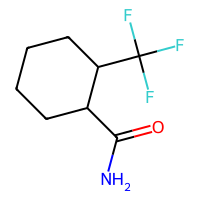
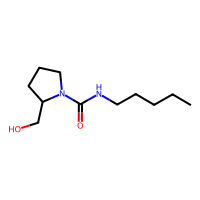
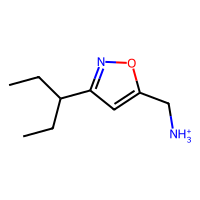
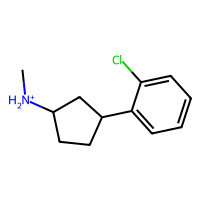
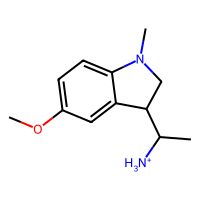
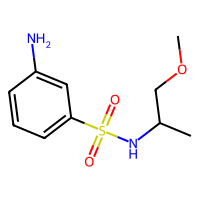
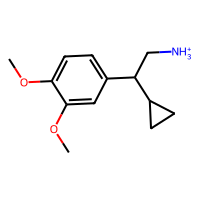
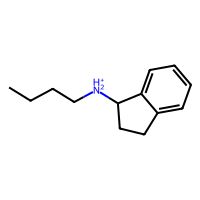
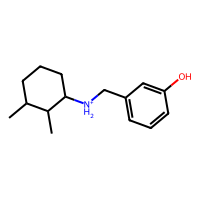
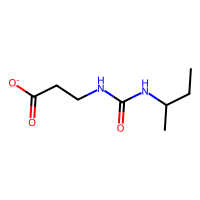

In [6]:
# Converted SMILES to RDKit molecules.
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [7]:
# Check if there is rows where RDKit failed to generate molecules from SMILES
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [8]:
# * Evaluate the descriptor of interest, that is the TPSA
from rdkit.Chem.Descriptors import TPSA

molecule = df.iloc[:, 1].values
descriptor = [TPSA(mol) for mol in molecule]
descriptor_df = pd.DataFrame(descriptor, columns=['TPSA'])
data = pd.concat([df, descriptor_df], axis=1)
data

,Smiles,Molecules,TPSA
0,NC(=O)C1CCCCC1C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fa3eca886d0>,43.09
1,CCCCCNC(=O)N1CCCC1CO,<rdkit.Chem.rdchem.Mol object at 0x7fa3eca88890>,52.57
2,CCC(CC)c1cc(C[NH3+])on1,<rdkit.Chem.rdchem.Mol object at 0x7fa3eca8a2d0>,53.67
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,<rdkit.Chem.rdchem.Mol object at 0x7fa3eca8a340>,16.61
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,<rdkit.Chem.rdchem.Mol object at 0x7fa3eca8a3b0>,40.11
...,...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,<rdkit.Chem.rdchem.Mol object at 0x7fa3ec097b50>,81.42
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,<rdkit.Chem.rdchem.Mol object at 0x7fa3ec097bc0>,46.10
5997,CCCC[NH2+]C1CCc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7fa3ec097c30>,16.61
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,<rdkit.Chem.rdchem.Mol object at 0x7fa3ec097ca0>,36.84


In [9]:
# Check again if there are empty values in our new dataset
data.isnull().sum()

Smiles       0
Molecules    0
TPSA         0
dtype: int64

In [10]:
# Evaluate the fingerprint of each molecules in our dataset
from rdkit import DataStructs
from rdkit.Chem import AllChem
import numpy as np

fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)
    
# Convert the fingerprint as an array 
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [11]:
fps.shape

(6000, 1024)

In [12]:
# Split our dataset

psa = data.iloc[:,2].values
psa.shape[0] == fps.shape[0] #check that our inputs/outputs have the same number of lines

True

In [13]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, psa, train_size=0.8, random_state=seed)

In [14]:
# Train the model

from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)#In order to cancel the printing of return value

In [15]:
# Check the accuracy of prediction
from sklearn.metrics import mean_squared_error, r2_score

psa_predict = svr.predict(X_test)
r2 = r2_score(y_test, psa_predict)
mse = mean_squared_error(y_test, psa_predict)

print(f'The r2_score is {r2} and\n the mean square error is {mse}')

The r2_score is 0.6547223397267017 and
 the mean square error is 155.09084115015642


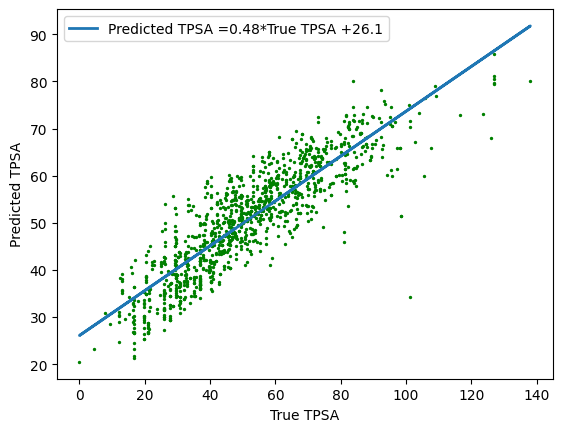

In [16]:
# Visualization of the results from the model

from scipy import stats
import matplotlib.pyplot as plt

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, psa_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, psa_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted TPSA ='+str(round(vect_norm,2))+'*True TPSA +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True TPSA')
plt.ylabel('Predicted TPSA')
plt.legend()
plt.show()

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où $\{\mathtt{I,\,X,\,Y,\,Z}\}$ sont les opérateurs de Pauli et les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

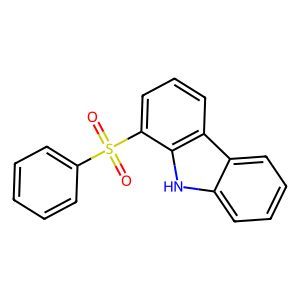

In [17]:
from rdkit import Chem

PSPCz = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(PSPCz)
Chem.Draw.MolToImage(m)

1. Utiliser `qiskit.opflow.operator_globals`  et `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver` pour calculer l'état fondamental de la molécule PSPCz.

In [18]:
# Code with opflow
from qiskit.opflow.operator_globals import I, X, Z
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

# Coefficients PSPCz
h1 = -0.518418
h2 = -0.136555
h3 = -0.025866
h5 = -0.000296
h4 = 0.015725

# Hamiltonian
H = h1*(I^I) + h2*(Z^I) - h2*(I^Z) + h3*(Z^Z) + h4*(X^X) + h5*(X^I) + h5*(I^X) + h5*(X^Z) - h5*(I^Z) 

exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'\n The exact ground state energy of PSPCz is: {exact_result.eigenvalue}')



 The exact ground state energy of PSPCz is: -0.7664101931381506


/tmp/ipykernel_37562/1819206839.py:2: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow.operator_globals import I, X, Z


# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library import EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant: 

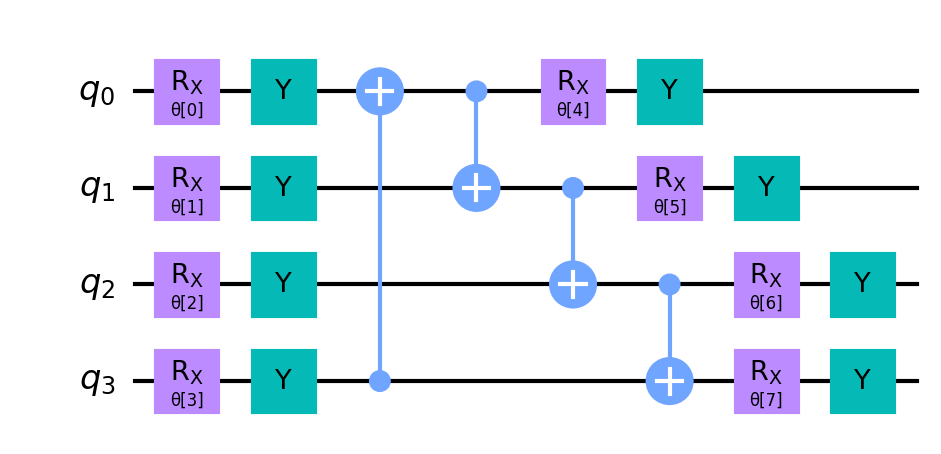

In [19]:
Image(filename='./SU2_Ansatz.png', width=400)

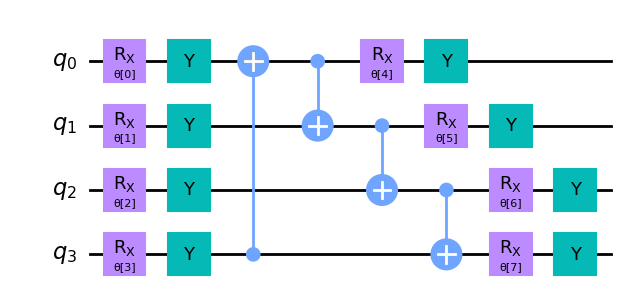

In [20]:
from qiskit.circuit.library import EfficientSU2

SU2ansatz = EfficientSU2(4, su2_gates=['rx', 'y'], entanglement='circular', reps=1)
SU2ansatz.decompose().draw('mpl')

1. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme de de VQE pour calculer l'état fondamental de la molécule $H_2$.  On utiliser la fonction `algorithm(problem, mapper, optimizer)` ci-dessous définie.

In [21]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # Previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [28]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [29]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

In [30]:
mapper = JordanWignerMapper() 
mapper = H2_problem.get_tapered_mapper(mapper)
optimizer = SLSQP()
H2_vqe = algorithm(H2_problem, mapper, optimizer)
H2_vqe.total_energies[0]

-1.1173432691225813